Zadatak 1
Zaključivanje na malom uzorku

Proučava se preciznost mjernog instrumenta mjerenjem masa dvaju različitih listova papira.
Ponavljajući
mjerenja više puta dobiveni su prikazani podaci u excel tablici. Pretpostavite da uzorci dolaze iz
normalne distribucije.


a) Na razini značajnosti od 5% testirajte jesu li prosječne mase dva različita papira jednake.
Objasniti što se testira u problemu i zašto ste koristi odgovarajuća funkciju za izračunavanje.

b) Ponovite prethodni test na razini značajnosti od 1%

c)  Usporedite svoje odgovore iz dijelova (a) i (b) te objasnite zašto su isti ili različiti.

d) Objasnite kako se na pitanja iz dijelova (a) i (b) može odgovoriti pomoću intervala pouzdanosti.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
d = {'papir1': [3.481, 3.477, 3.47, 3.448, 3.472, 3.47, 3.485, 3.464, 3.477, 3.475,3.472,3.473, 3.472, 3.47, 3.474],
     'papir2': [3.258, 3.254, 3.256, 3.249, 3.241, 3.254, 3.247, 3.257, 3.239, 3.25, 3.258, 3.239, 3.245, 3.24, 3.254 ]}
df = pd.DataFrame(data=d)
df

,papir1,papir2
0,3.481,3.258
1,3.477,3.254
2,3.470,3.256
3,3.448,3.249
4,3.472,3.241
5,3.470,3.254
6,3.485,3.247
7,3.464,3.257
8,3.477,3.239
9,3.475,3.250


In [62]:
ttest, p = stats.ttest_ind(df['papir1'], df['papir2'])
if p > 0.05:
  print("Prosjecne mase papira su jednake")
else:
  print("Prosjecne mase papira nisu jednake")

Prosjecne mase papira nisu jednake


In [63]:
p

2.08593386840301e-34

In [15]:
if p > 0.01:
  print("Prosjecne mase papira su jednake")
else:
  print("Prosjecne mase papira nisu jednake")

Prosjecne mase papira nisu jednake


Rezultati testiranja a) i b) su isto zato što je izračunata p vrijednost ekstremno mala pa su rezultati za znacajnost od 5% i 1% identicni.


In [55]:
confidence_interval = stats.ttest_ind(df['papir1'], df['papir2']).confidence_interval(confidence_level=0.99)
print(f"Interval pouzdanosti za razliku izmedu masa papira 1 i papira 2: {confidence_interval.low:.4f}, {confidence_interval.high:.4f})")

Interval pouzdanosti za razliku izmedu masa papira 1 i papira 2: 0.2148, 0.2304)


In [61]:
confidence_interval = stats.ttest_ind(df['papir1'], df['papir2']).confidence_interval(confidence_level=0.95)
print(f"Interval pouzdanosti za razliku izmedu masa papira 1 i papira 2: {confidence_interval.low:.4f}, {confidence_interval.high:.4f})")

Interval pouzdanosti za razliku izmedu masa papira 1 i papira 2: 0.2168, 0.2284)


Zadatak 2 Parametarski/neparametarski testovi

U istraživanju su sudjelovali ispitanici koji su prošli specifični program/intervenciju za
poboljšanje vještina.
Prikupljeni su rezultati testova prije (Pre) i poslije (Post) sudjelovanja u
programu.

1. Analiza podataka:
o Učitajte priloženi skup podataka iz excel tablice.
o Provjerite osnovne statistike rezultata prije i poslije (medijan, kvartile, raspon,
itd.) – deskriptivna statistika

2. Odabir metode:
o Odredite jesu li podaci normalno distribuirani.
o Koristiti odgovarajuću metodu kako bi odgovorili na pitanje postoji li razlika
između skupina podataka (npr. prije i poslije intervencije).

3. Vizualizacija podataka:
o Prikazujte podatke koristeći boxplot ili histogram razlika.

4. Interpretacija rezultata:
o Napišite kratki izvještaj s odgovorom na pitanje: Postoji li značajna razlika
između rezultata prije i poslije?

In [25]:
data = pd.read_excel('sample_data/ispitanici.xlsx')
data.head(5)

,Group,Pre,Post
0,ispitanik1,31,48
1,ispitanik2,39,51
2,ispitanik3,56,67
3,ispitanik4,47,44
4,ispitanik5,29,33


In [32]:
mean_pre = np.mean(data['Pre'])
median_pre = np.median(data['Pre'])
first_quartile_pre = np.percentile(data['Pre'], 25)
third_quartile_pre = np.percentile(data['Pre'], 75)
max_pre = np.max(data['Pre'])
min_pre = np.min(data['Pre'])
range_pre = np.max(data['Pre']) - np.min(data['Pre'])

mean_post = np.mean(data['Post'])
median_post = np.median(data['Post'])
first_quartile_post = np.percentile(data['Post'], 25)
third_quartile_post = np.percentile(data['Post'], 75)
max_post = np.max(data['Post'])
min_post = np.min(data['Post'])
range_post = np.max(data['Post']) - np.min(data['Post'])

print("Deskriptivna statistika prije")
print(f"Prosjek prije: {mean_pre:.2f}")
print(f"Median prije: {median_pre:.2f}")
print(f"Prvi kvartil prije: {first_quartile_pre:.2f}")
print(f"Treci kvartil prije: {third_quartile_pre:.2f}")
print(f"Min prije: {min_pre:.2f}")
print(f"Max prije: {max_pre:.2f}")
print(f"Raspon prije: {range_pre:.2f}")

print("Deskriptivna statistika poslije")
print(f"Prosjek poslije: {mean_post:.2f}")
print(f"Median poslije: {median_post:.2f}")
print(f"Prvi kvartil poslije: {first_quartile_post:.2f}")
print(f"Treci kvartil poslije: {third_quartile_post:.2f}")
print(f"Min poslije: {min_post:.2f}")
print(f"Max poslije: {max_post:.2f}")
print(f"Raspon poslije: {range_post:.2f}")

Deskriptivna statistika prije
Prosjek prije: 37.40
Median prije: 36.00
Prvi kvartil prije: 31.00
Treci kvartil prije: 46.00
Min prije: 11.00
Max prije: 56.00
Raspon prije: 45.00
Deskriptivna statistika poslije
Prosjek poslije: 43.85
Median poslije: 43.50
Prvi kvartil poslije: 35.75
Treci kvartil poslije: 53.00
Min poslije: 11.00
Max poslije: 67.00
Raspon poslije: 56.00


In [58]:
p1 = stats.kstest(data['Pre'], 'norm').pvalue
p2 = stats.kstest(data['Post'], 'norm').pvalue
if p1 > 0.05 and p2 > 0.05:
  print("Podaci su normalno distribuirani")
else:
  print("Podaci nisu normalno distribuirani")

Podaci nisu normalno distribuirani


In [59]:
ttest , p = stats.wilcoxon(data['Pre'], data['Post'])
p

1.5311801710525323e-07

In [60]:
if p > 0.05:
  print("Ne postoji znacajna razlika izmedu rezultata ispitanika prije i poslije ")
else:
  print("Postoji znacajna razlika izmedu rezultata ispitanika prije i poslije ")

Postoji znacajna razlika izmedu rezultata ispitanika prije i poslije 


<Axes: >

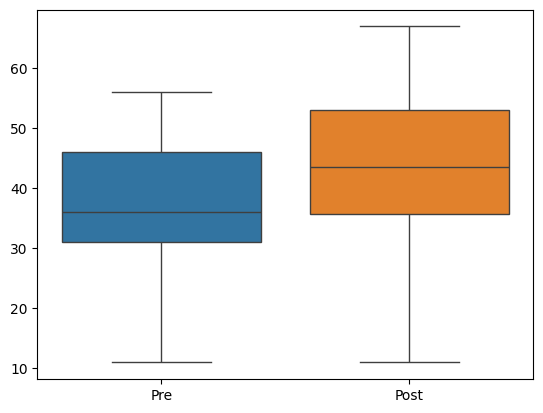

In [45]:
import seaborn as sns
sns.boxplot(data=[data['Pre'], data['Post']])

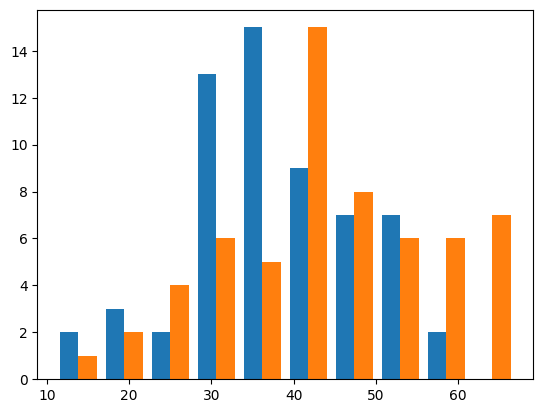

In [48]:
plt.hist([data['Pre'], data['Post']])
plt.show()